In [0]:
from google.colab import drive
import numpy as np
from scipy.linalg import circulant
import time
import matplotlib.pyplot as plt
%matplotlib inline
import cvxpy as cvx

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
f = open('/content/drive/My Drive/pim.txt')
pim = f.readline()
pim = pim.split('\t')
pim = np.array(list(map(lambda x: float(x), pim)))
f.close()

In [0]:
f = open('/content/drive/My Drive/nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()

In [0]:
f = open('/content/drive/My Drive/u1.txt')
u1 = f.readline()
u1 = u1.split('\t')
u1 = np.array(list(map(lambda x: float(x), u1)))
f.close()

In [0]:
K = 10
L = 900
N = 900

In [0]:
m = pim[:N].reshape((N,1))
m1 = u1[:N].reshape((N,1))
nf1 = nf[:N].reshape((N,1))

In [0]:

C = np.random.randn(L,N)

h11 = np.random.randn(K,1)
h12 = np.random.randn(K,1)
h21 = np.random.randn(K,1)
h22 = np.random.randn(K,1)

B = np.random.randn(L,K)

In [0]:

A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))

In [0]:
X0 = h11 @ m.reshape((1,N))
X1 = h12 @ m1.reshape((1,N))
X00 = h21 @ m.reshape((1,N))
X2 = h22 @ m1.reshape((1,N))

Xu = np.vstack((X1,X2))
Xpim = np.vstack((X0,X00))
X = Xu + Xpim

In [0]:

a, b = A.shape
A0 = np.zeros((a,b))
A1 = np.hstack((A,A0))
A2 = np.hstack((A0,A))
A = np.vstack((A1,A2))

In [0]:
y =  A @ cvx.vec(X) + nf[:2*N]

In [0]:

start = time.time()
W1 = cvx.Variable((2*K,2*K), symmetric=True)
W2 = cvx.Variable((N,N),  symmetric=True)
Z = cvx.Variable((2*K,N))

constraints = [cvx.bmat([[W1,Z],[Z.T,W2]]) >> 0,
               y == A @ cvx.vec(Z)]
obj = cvx.Minimize(1/2 * (cvx.trace(W1) + cvx.trace(W2)))
problem = cvx.Problem(obj, constraints)
problem.solve()
print(-start + time.time())

315.3007242679596


In [0]:
Xk = Z.value

In [0]:
u, s, v = np.linalg.svd(Xk)

In [0]:
s

array([1.43290342e+00, 1.59273775e-01, 9.44003669e-02, 7.30245379e-02,
       6.71439453e-02, 4.92370433e-02, 4.65115017e-02, 4.46345392e-02,
       3.76501517e-02, 2.69937480e-02, 1.86688875e-02, 1.42276623e-02,
       9.96738020e-03, 5.79534866e-03, 3.93090479e-03, 3.69064669e-04,
       3.62800454e-04, 3.49253286e-04, 3.43052747e-04, 3.26083964e-04])

In [0]:
signal1 = v[0,:]

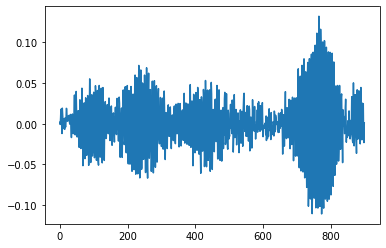

In [0]:
plt.plot(signal1)

In [0]:
signal2 = v[1,:]

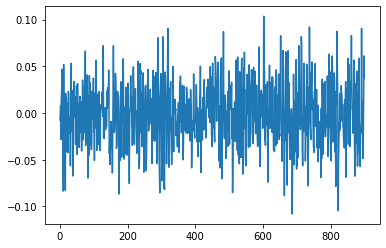

In [0]:
plt.plot(signal2)

In [0]:
def sae(s1, s2):
    return np.arccos((s1 @ s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))) ** 2

In [0]:
sae(u1[:900], v[1,:])

0.9220555051429528

In [0]:
sae(pim[:900], v[0,:])

0.09852786145185563